In [1]:
import pandas as pd
import os
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt

In [9]:
def feature_extraction(root_folder,filename,  column):
    features_extract = pd.DataFrame(columns=['ID', 'Task', 'Average', 'Max', 'Min', 'Median', 'Std'])  # DataFrame to store the EDA data

    # Recursive traversal of all files in the root folder
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            # Check if the file is an EDA data file
            if file.endswith(filename):  #find all the RR file: "_rr_filtered.csv"
                # Extract the individual ID and task from the file name
                file_parts = file.split('_')
                id = file_parts[0]  # Assuming the individual ID is the first part of the file name
                task = file_parts[1]  # Assuming the task is the second part of the file name

                # Read the EDA data from the file and add it to the DataFrame
                try:
                    rr_data = pd.read_csv(os.path.join(root, file),  sep=';')
                    # Calcule la moyenne des valeurs de la troisième colonne du fichier rr_data
                    rr_mean = rr_data.iloc[:, column].mean()
                    rr_max=rr_data.iloc[:,column].max()
                    rr_min = rr_data.iloc[:,column].min()
                    rr_median = rr_data.iloc[:,column].median()
                    rr_std = rr_data.iloc[:,column].std()
                    # Crée un DataFrame avec la moyenne des valeurs RR pour chaque fichier
                    df = pd.DataFrame({'ID': id, 'Task': task, 'Average': rr_mean, 'Max': rr_max, 'Min': rr_min, 'Median': rr_median, 'Std': rr_std}, index=[0])
                    
                    features_extract= pd.concat([features_extract, df], ignore_index=True)
                except Exception as e:
                    print(f"Error reading file {file}: {e}")

    return features_extract

In [3]:
root_filtered=r"C:\Users\lexan\Documents\ISMIN 2023-2024\projet ecole\data_rr_filtered"

In [13]:
filename='Baseline_rr_filtered.csv'

In [14]:
features_filtered = feature_extraction(root_filtered, filename,1)

C:\Users\lexan\AppData\Local\Temp\ipykernel_7276\1106703070.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_extract= pd.concat([features_extract, df], ignore_index=True)


In [15]:
features_filtered.head(10)

,ID,Task,Average,Max,Min,Median,Std
0,2ea4,Baseline,-27.506340,17159.898188,-14472.777702,-1109.175627,4762.386892
1,2hpu,Baseline,-13.711056,5111.554910,-4295.438992,6.161302,1708.617250
2,2z7d,Baseline,3.228848,3249.542438,-3194.280129,-52.876586,1283.631052
3,37ir,Baseline,-15.828967,8870.197176,-7009.417946,-331.222113,3028.322339
4,45lx,Baseline,15.078720,10236.202946,-8136.784198,-237.160928,3440.846610
5,4e8r,Baseline,2.787456,10264.193937,-8471.287178,-78.864401,3442.268225
6,4woj,Baseline,-5.528163,7366.354067,-5080.630210,1.312952,2231.852324
7,5f7t,Baseline,31.428370,8784.330840,-9281.128814,-268.345186,2658.595066
8,6g6y,Baseline,-20.444536,8222.692149,-9597.463160,244.163930,3327.933681
9,6k5f,Baseline,-37.102419,16725.191109,-8747.378028,-822.108887,4345.235476


In [16]:
features_clean= feature_extraction(root_filtered, filename, 3)

C:\Users\lexan\AppData\Local\Temp\ipykernel_7276\1106703070.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_extract= pd.concat([features_extract, df], ignore_index=True)


In [17]:
features_clean.head(10)

,ID,Task,Average,Max,Min,Median,Std
0,2ea4,Baseline,-61.454805,25487.075028,-18605.278832,-1761.192022,7225.104718
1,2hpu,Baseline,-17.849476,7894.348413,-6989.668604,-451.901977,2977.104861
2,2z7d,Baseline,6.228335,7517.090521,-5842.190494,105.322910,2101.326205
3,37ir,Baseline,-34.823996,13058.792188,-10483.271308,-471.181052,5103.888156
4,45lx,Baseline,57.634644,21632.907135,-9781.535819,-1223.099188,5626.561722
5,4e8r,Baseline,15.125520,22397.779749,-12235.654510,-10.861636,5295.243361
6,4woj,Baseline,16.587276,11941.799217,-7305.678238,-452.733703,3569.162223
7,5f7t,Baseline,100.656368,18177.386477,-21951.902870,-562.467302,4781.302491
8,6g6y,Baseline,-38.743611,10948.251257,-11927.489338,237.717725,4386.621375
9,6k5f,Baseline,-64.615991,28269.043155,-6652.035565,-1984.907514,5957.251774


In [18]:
from scipy import signal

def calculate_psd(respiration_rate, fs, fmin, fmax):
    f, Pxx = signal.welch(respiration_rate, fs=fs)
    print(f)
    psd = Pxx[(f >= fmin) & (f <= fmax)]
    return f, Pxx

In [21]:
root_onfile = r"C:\Users\lexan\Documents\ISMIN 2023-2024\projet ecole\data_rr_filtered\2ea4\2ea4_Video1_rr_filtered.csv"

In [23]:
rr_data=pd.read_csv(root_onfile, sep=';')

In [24]:
frequencies, psd= calculate_psd(rr_data['rr_filtered'], 1, 0.1 , 0.2)
print(frequencies)
print(psd)

[0.         0.00390625 0.0078125  0.01171875 0.015625   0.01953125
 0.0234375  0.02734375 0.03125    0.03515625 0.0390625  0.04296875
 0.046875   0.05078125 0.0546875  0.05859375 0.0625     0.06640625
 0.0703125  0.07421875 0.078125   0.08203125 0.0859375  0.08984375
 0.09375    0.09765625 0.1015625  0.10546875 0.109375   0.11328125
 0.1171875  0.12109375 0.125      0.12890625 0.1328125  0.13671875
 0.140625   0.14453125 0.1484375  0.15234375 0.15625    0.16015625
 0.1640625  0.16796875 0.171875   0.17578125 0.1796875  0.18359375
 0.1875     0.19140625 0.1953125  0.19921875 0.203125   0.20703125
 0.2109375  0.21484375 0.21875    0.22265625 0.2265625  0.23046875
 0.234375   0.23828125 0.2421875  0.24609375 0.25       0.25390625
 0.2578125  0.26171875 0.265625   0.26953125 0.2734375  0.27734375
 0.28125    0.28515625 0.2890625  0.29296875 0.296875   0.30078125
 0.3046875  0.30859375 0.3125     0.31640625 0.3203125  0.32421875
 0.328125   0.33203125 0.3359375  0.33984375 0.34375    0.3476

(4e-09, 20000000.0)

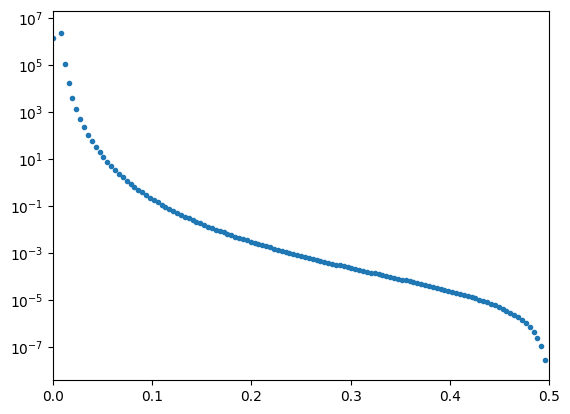

In [25]:
plt.semilogy(frequencies, psd, '.')
plt.xlim(0, 0.5)
plt.ylim(4e-9,2e7)

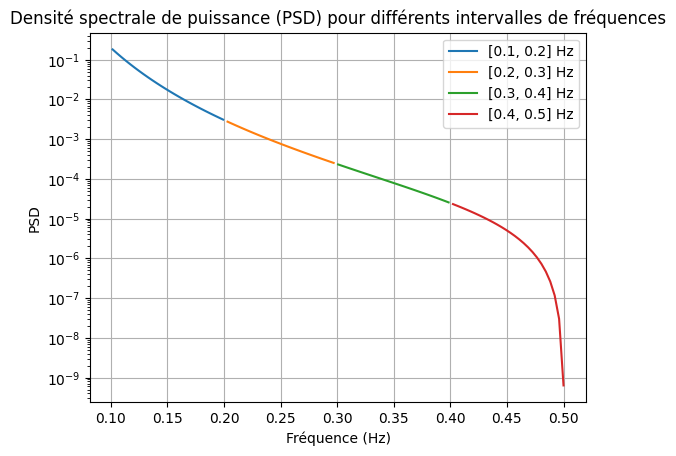

In [26]:
frequency_intervals = [(0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5)]


for fmin, fmax in frequency_intervals:
    f, Pxx = signal.welch(rr_data['rr_filtered'], fs=1)
    mask = (f >= fmin) & (f <= fmax)
    plt.semilogy(f[mask], Pxx[mask], label=f'[{fmin}, {fmax}] Hz')

plt.xlabel('Fréquence (Hz)')
plt.ylabel('PSD')
plt.title('Densité spectrale de puissance (PSD) pour différents intervalles de fréquences')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
signal_neurokit, info_neurokit=nk.rsp_process(rr_data['rr_filtered'], sampling_rate=250)

In [28]:
signal_neurokit

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_RVT,RSP_Phase,RSP_Phase_Completion,RSP_Symmetry_PeakTrough,RSP_Symmetry_RiseDecay,RSP_Peaks,RSP_Troughs
0,-4025.320451,-2906.819571,10229.098299,9.301105,8245.991206,NaN,0.0,0.546624,0.539586,0,0
1,-4003.829083,-2889.068046,10229.098299,9.301105,8246.259550,NaN,0.0,0.546624,0.539586,0,0
2,-3982.128472,-2870.876488,10229.098299,9.301105,8246.535257,NaN,0.0,0.546624,0.539586,0,0
3,-3960.218371,-2852.259225,10229.098299,9.301105,8246.818316,NaN,0.0,0.546624,0.539586,0,0
4,-3938.098543,-2833.230289,10229.098299,9.301105,8247.108712,NaN,0.0,0.546624,0.539586,0,0
...,...,...,...,...,...,...,...,...,...,...,...
86995,0.071033,0.468249,4138.101458,9.615385,1507.051584,NaN,0.0,0.559239,0.502564,0,0
86996,0.060436,0.408074,4138.101458,9.615385,1506.907666,NaN,0.0,0.559239,0.502564,0,0
86997,0.050946,0.352389,4138.101458,9.615385,1506.753631,NaN,0.0,0.559239,0.502564,0,0
86998,0.042503,0.301189,4138.101458,9.615385,1506.589490,NaN,0.0,0.559239,0.502564,0,0


In [ ]:
def peak_detection:
    